In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
#install the dependences
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
#Load the data
df = yf.download('NFLX', start ='2012-01-01')
df = df.drop('High', axis='columns')
df = df.drop('Low', axis='columns')
df

[*********************100%***********************]  1 of 1 completed


,Open,Close,Adj Close,Volume
Date,,,,
2012-01-03 00:00:00-05:00,10.040000,10.320000,10.320000,29213800
2012-01-04 00:00:00-05:00,10.335714,11.492857,11.492857,100489900
2012-01-05 00:00:00-05:00,11.345714,11.328571,11.328571,86552900
2012-01-06 00:00:00-05:00,11.302857,12.327143,12.327143,125610800
2012-01-09 00:00:00-05:00,12.801429,14.025714,14.025714,214073300
...,...,...,...,...
2023-01-25 00:00:00-05:00,360.570007,367.959991,367.959991,7766900
2023-01-26 00:00:00-05:00,368.769989,364.869995,364.869995,8256800
2023-01-27 00:00:00-05:00,363.200012,360.769989,360.769989,6696100


In [4]:
#Get the number of trading days
df.shape

(2788, 4)

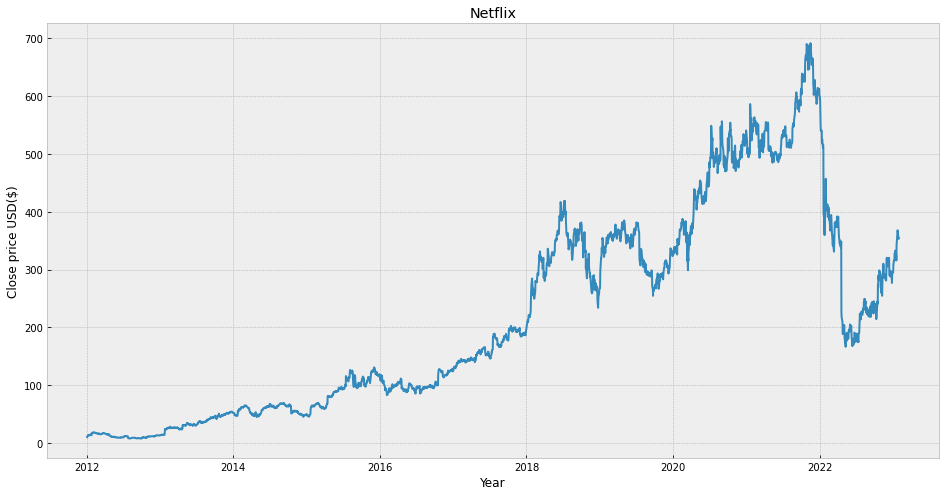

In [5]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Year')
plt.ylabel('Close price USD($)')
plt.plot(df['Close'])
plt.show()

In [6]:
#Get the close price 
df = df[['Close']]
df

,Close
Date,
2012-01-03 00:00:00-05:00,10.320000
2012-01-04 00:00:00-05:00,11.492857
2012-01-05 00:00:00-05:00,11.328571
2012-01-06 00:00:00-05:00,12.327143
2012-01-09 00:00:00-05:00,14.025714
...,...
2023-01-25 00:00:00-05:00,367.959991
2023-01-26 00:00:00-05:00,364.869995
2023-01-27 00:00:00-05:00,360.769989


In [7]:
#Create a variable to predict the 'X' days out into the future
future_days = 500
#Create a new column (target) shifted 'X' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)


<ipython-input-7-4ada9526cc74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


,Close,Prediction
Date,,
2023-01-26 00:00:00-05:00,364.869995,NaN
2023-01-27 00:00:00-05:00,360.769989,NaN
2023-01-30 00:00:00-05:00,353.109985,NaN
2023-01-31 00:00:00-05:00,353.859985,NaN


In [8]:
#Create the feture dataset (x) and convert it to a numpy array and remove the last 'X' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 10.31999969]
 [ 11.49285698]
 [ 11.32857132]
 ...
 [548.15997314]
 [539.45001221]
 [552.15997314]]


<ipython-input-8-4ff01ef92177>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [9]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 52.4271431   52.59571457  51.83142853 ... 360.76998901 353.10998535
 353.85998535]


In [10]:
#Split the data into 75% traning and 25% testing 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
#Create the models
#Create the desion tree regression model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [12]:
#get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-12-4e0f53299ae5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Prediction'],1)[:-future_days]


array([[359.97000122],
       [351.76998901],
       [359.07000732],
       [356.86999512],
       [361.92001343],
       [359.91000366],
       [356.97000122],
       [363.01998901],
       [363.91000366],
       [364.97000122],
       [362.86999512],
       [358.1000061 ],
       [357.32000732],
       [351.04000854],
       [354.29998779],
       [359.60998535],
       [352.6000061 ],
       [349.6000061 ],
       [358.85998535],
       [356.26998901],
       [361.20999146],
       [358.82000732],
       [361.45999146],
       [363.44000244],
       [358.77999878],
       [375.22000122],
       [377.86999512],
       [361.01000977],
       [366.23001099],
       [359.97000122],
       [353.36999512],
       [354.60998535],
       [356.55999756],
       [366.95999146],
       [367.72000122],
       [369.75      ],
       [367.88000488],
       [365.48999023],
       [361.41000366],
       [364.70999146],
       [363.92001343],
       [367.6499939 ],
       [351.14001465],
       [348

In [13]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[512.17999268 498.61999512 559.07000732 563.59002686 557.59002686
 556.52001953 557.2800293  551.34002686 548.2199707  540.2199707
 511.9400177  546.15002441 475.73999023 546.70001221 538.84997559
 550.64001465 547.82000732 525.69000244 511.29000854 516.39001465
 470.20001221 497.8999939  419.6000061  499.89001465 518.02001953
 527.07000732 524.0300293  524.44000244 504.79000854 512.17999268
 523.10998535 535.09002686 520.80999756 499.42498779 526.27001953
 513.95001221 513.39001465 521.65997314 421.97000122 540.66998291
 544.5300293  476.26000977 554.58001709 555.30999756 495.07998657
 553.72998047 540.02001953 549.2199707  546.53997803 554.44000244
 549.57000732 518.05999756 508.77999878 505.54998779 510.29998779
 386.67001343 391.30999756 509.         513.4699707  509.10998535
 503.17999268 496.07998657 366.42001343 503.83999634 477.57998657
 495.07998657 484.98001099 486.66000366 493.36999512 488.94000244
 486.27999878 487.70001221 477.57998657 497.89001465 498.61999512
 501.339996

<ipython-input-14-44b9d8830c47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predctions'] = predictions


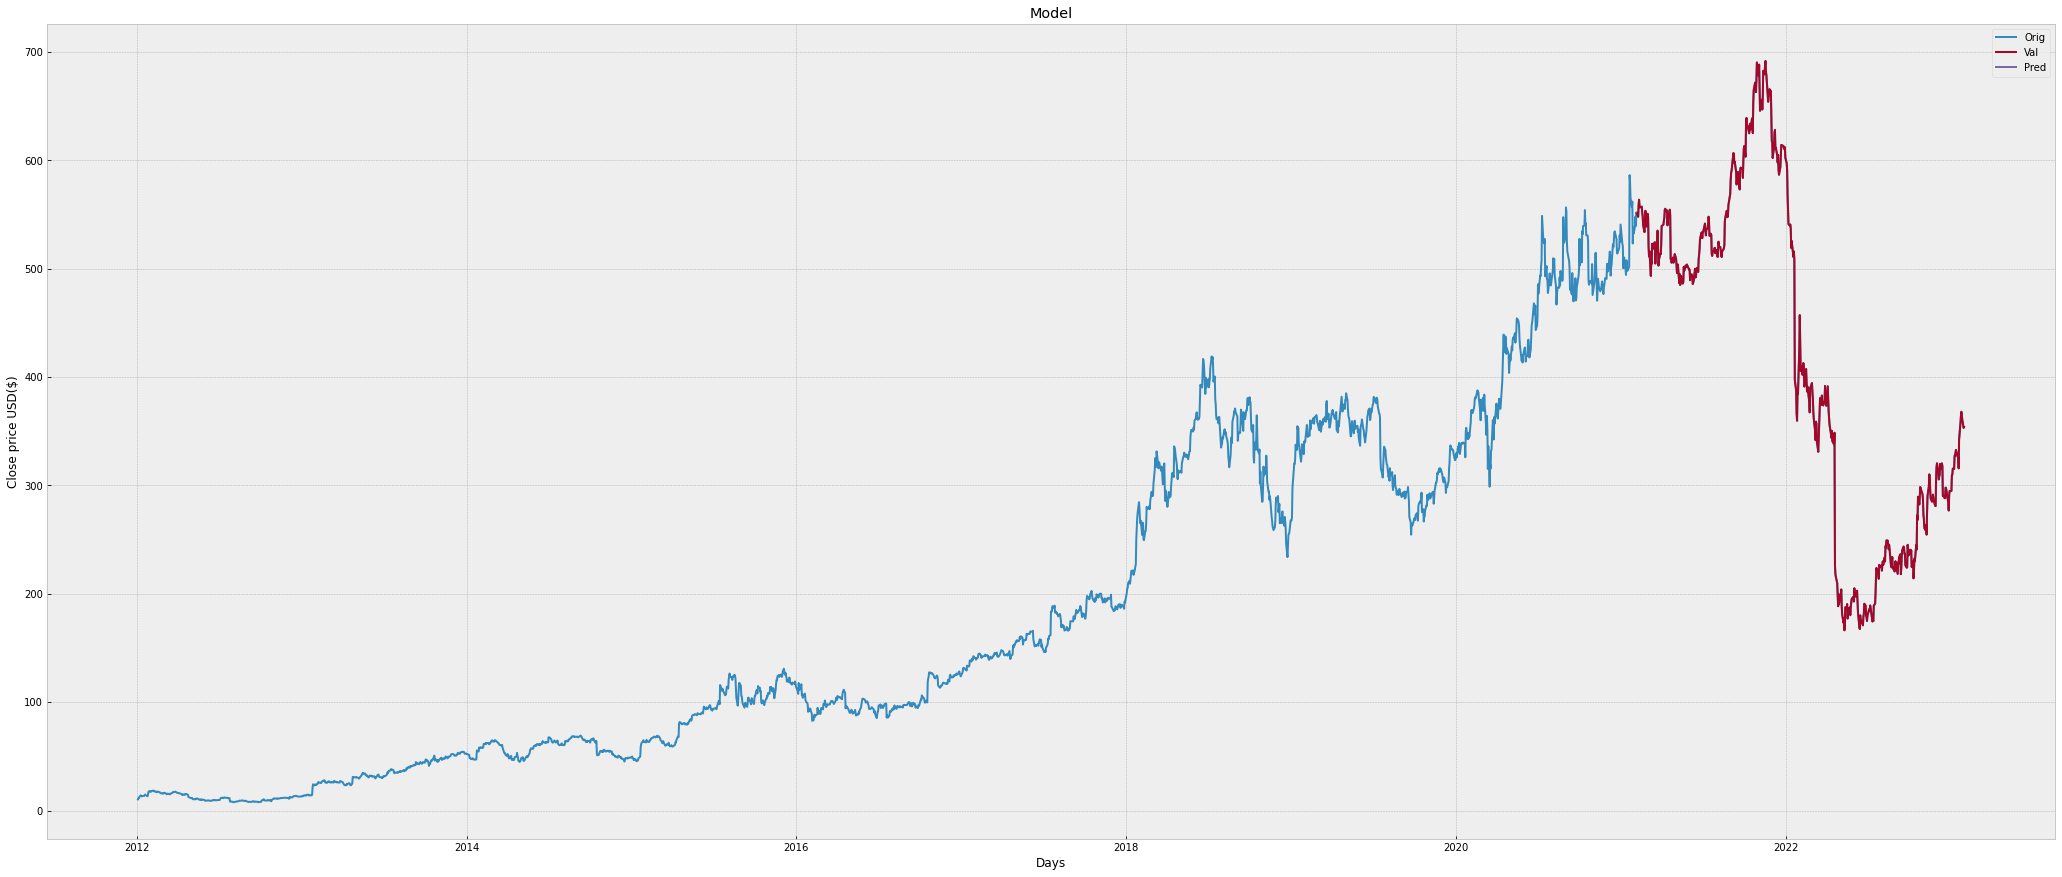

In [14]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predctions'] = predictions
plt.figure(figsize=(36,15))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [15]:
#Check the RMSE
rmse = np.sqrt(np.mean(tree_prediction - y_test.shape)** 2)
rmse

49.21314019775391

<ipython-input-16-26cecee5336e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predctions'] = predictions


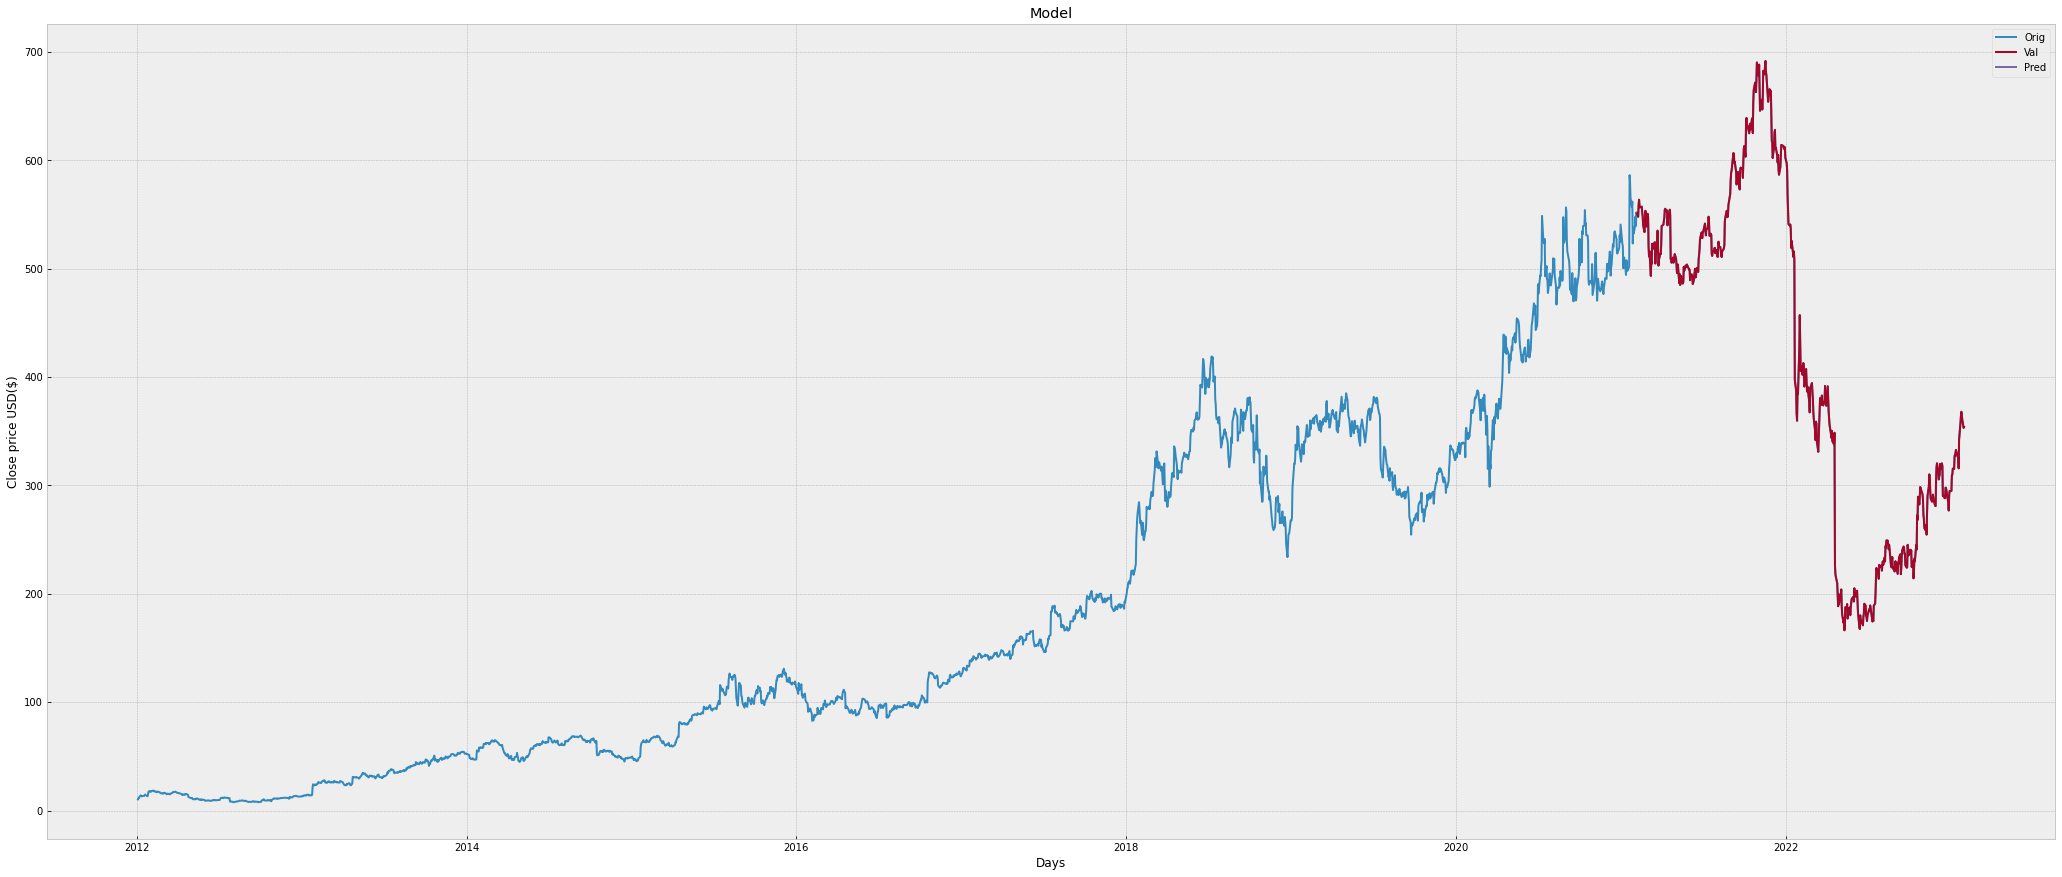

In [16]:
#Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predctions'] = predictions
plt.figure(figsize=(36,15))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [17]:
rmse = np.sqrt( np.mean(lr_prediction - y_test.shape)** 2)
rmse

34.05066950665334